In [1]:
# First things first
import pandas as pd # For data manipulation

#https://www.kaggle.com/heeraldedhia/groceries-dataset?select=Groceries_dataset.csv
df = pd.read_csv(r'Groceries_dataset.csv') # Reading the csv file
print("The shape of df is {}".format(df.shape)) # Knowing its dimensions

df.head(10) # Being familiar with it

The shape of df is (38765, 3)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


## Aggregating the data

In [2]:
df.Date = pd.to_datetime(df.Date) # Transforming this column into Timestamp object
df_agg = pd.crosstab(df.Date, df.Member_number.sum()).rename_axis(None) # Aggregating the rows
df_agg = df_agg.sort_index() # Sorting by date
df_agg = df_agg.asfreq('D', fill_value = -100) # setting up the frequency and fill the missing values

df_agg.head(3)

col_0,116436177
2014-01-01,48
2014-01-02,62
2014-01-03,54


In [3]:
df_agg = df_agg.rename(columns={df_agg.columns[0]: "total_shoppers"}) # New column name
df_agg['month'] = df_agg.index.month # New column extracted from DatetimeIndex 
df_agg['day'] = df_agg.index.day_name() # New column extracted from DatetimeIndex  

df_agg.tail()

col_0,total_shoppers,month,day
2015-12-26,37,12,Saturday
2015-12-27,74,12,Sunday
2015-12-28,58,12,Monday
2015-12-29,57,12,Tuesday
2015-12-30,53,12,Wednesday


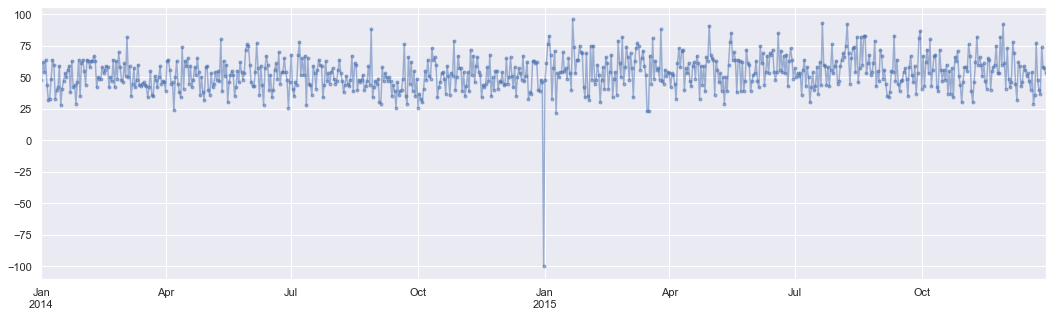

In [5]:
from seaborn import set as sns_set
sns_set(rc={'figure.figsize':(18, 5)})
df_agg.total_shoppers.plot(marker='.', alpha=0.5, legend = False);

In [6]:
df_agg_15 = df_agg.loc['2015'] # Selecting all rows where the index matchs with '2015'
print("The shape of df is {}".format(df_agg_15.shape)) # Knowing its dimensions
df_agg_15

The shape of df is (364, 3)


col_0,total_shoppers,month,day
2015-01-01,48,1,Thursday
2015-01-02,61,1,Friday
2015-01-03,76,1,Saturday
2015-01-04,83,1,Sunday
2015-01-05,68,1,Monday
...,...,...,...
2015-12-26,37,12,Saturday
2015-12-27,74,12,Sunday
2015-12-28,58,12,Monday
2015-12-29,57,12,Tuesday


## How to Decompose a TS

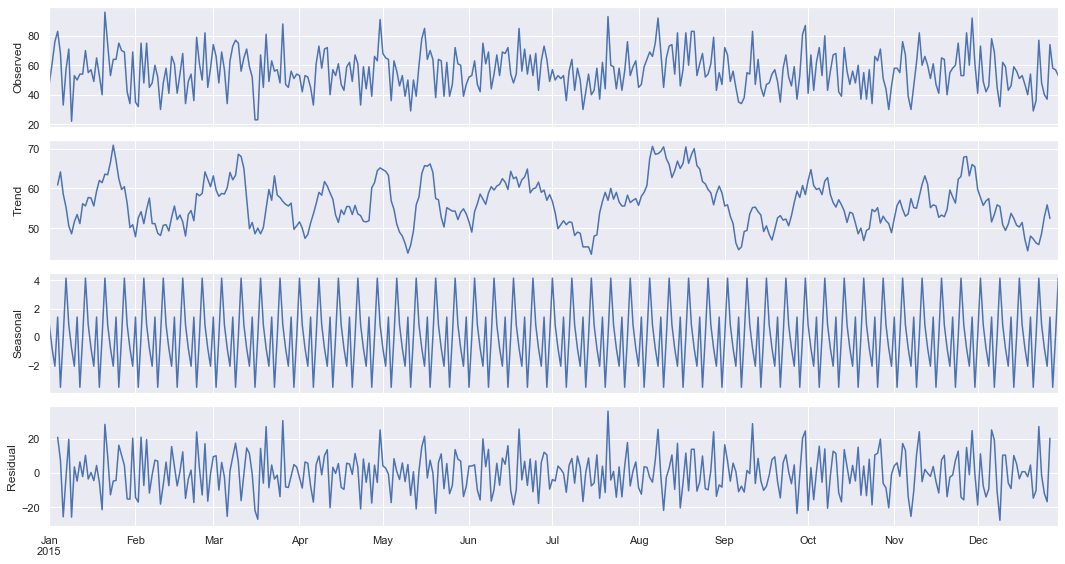

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(x=df_agg_15.total_shoppers, model='additive') #Automatically decomposition

sns_set(rc = {'figure.figsize':(15, 8)})
result.plot();

In [10]:
result_3 = seasonal_decompose(x = df_agg_15.total_shoppers.loc['2015-01':'2015-03']
                              , model='additive') # Automatically decomposition

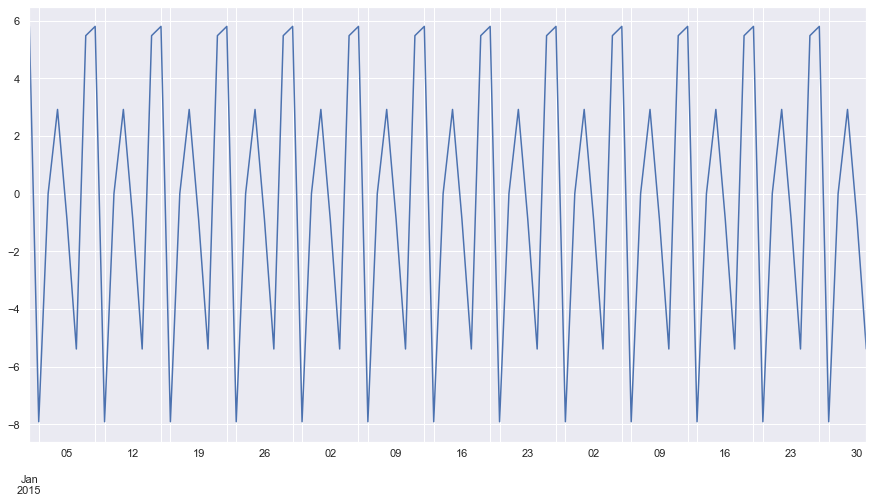

In [11]:
from matplotlib.dates import WeekdayLocator, MO, SU # To Locate days of the week and some constants for the days

loc = WeekdayLocator(byweekday=(MO, SU)) # tick on mondays and sunday every week

ax = result_3.seasonal.plot()
ax.xaxis.set_major_locator(loc)

## The stationary test  

In [17]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_agg_15.total_shoppers)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {:.5}'.format(result[1]))

ADF Statistic: -17.340574714191305
p-value: 5.343e-30


In [ ]:
days = df_agg.groupby('day', as_index=False).mean()
days.sort_values(by = 'total_shoppers')